# Mobile Price Prediction using Machine Learning Algorithms

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

data=pd.read_csv('train.csv')
data.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [7]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [9]:
data.shape

(2000, 21)

In [10]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# VISUALIZATION

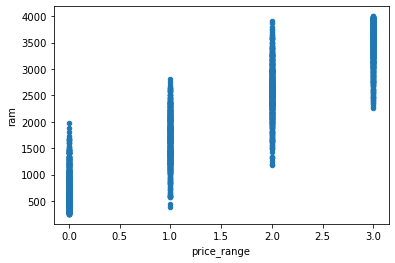

In [12]:
data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

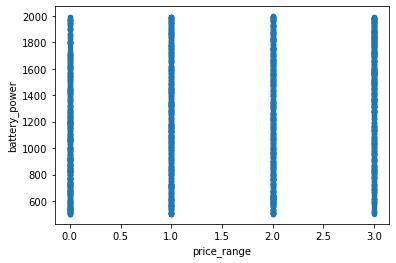

In [13]:
data.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

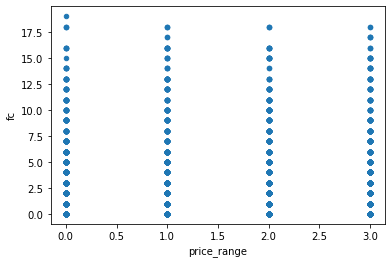

In [14]:
data.plot(x='price_range',y='fc',kind='scatter')
plt.show()

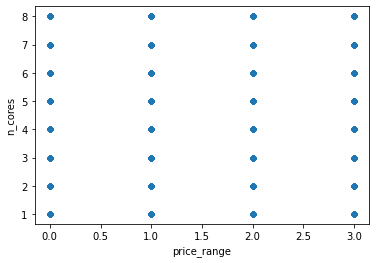

In [15]:
data.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

<AxesSubplot:>

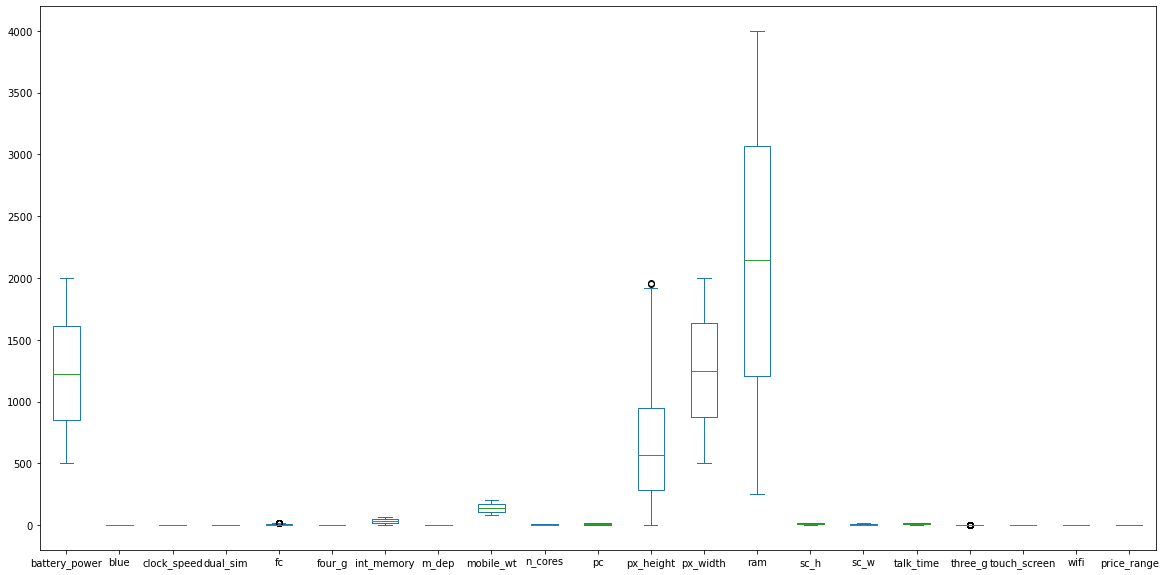

In [16]:
data.plot(kind='box',figsize=(20,10))

In [17]:
# Traning the model

In [18]:
x = data.drop('price_range',axis=1)
y = data['price_range']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
x_train

array([[-0.5390358 ,  1.02589061, -1.26199175, ..., -1.77142063,
        -1.00333891,  0.99115027],
       [ 1.71411952, -0.9747628 , -0.03840697, ...,  0.56451866,
        -1.00333891,  0.99115027],
       [-1.2530639 , -0.9747628 , -1.26199175, ...,  0.56451866,
         0.9966722 ,  0.99115027],
       ...,
       [-0.10835219, -0.9747628 ,  0.57338543, ..., -1.77142063,
        -1.00333891,  0.99115027],
       [-0.10608543, -0.9747628 ,  1.06281934, ...,  0.56451866,
         0.9966722 ,  0.99115027],
       [-1.20546203, -0.9747628 , -1.26199175, ...,  0.56451866,
        -1.00333891,  0.99115027]])

In [22]:
x_test

array([[ 0.49007136,  1.02589061, -1.26199175, ...,  0.56451866,
         0.9966722 , -1.00892875],
       [-0.33049426,  1.02589061, -1.26199175, ..., -1.77142063,
         0.9966722 , -1.00892875],
       [ 0.64874427,  1.02589061,  0.32866847, ...,  0.56451866,
        -1.00333891,  0.99115027],
       ...,
       [-1.38906925,  1.02589061,  0.45102695, ...,  0.56451866,
        -1.00333891, -1.00892875],
       [-0.31916048, -0.9747628 , -0.89491632, ...,  0.56451866,
        -1.00333891,  0.99115027],
       [-0.1332865 ,  1.02589061, -0.89491632, ..., -1.77142063,
        -1.00333891,  0.99115027]])

### Prediction using Algorithms 

#### 1. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
pred = dtc.predict(x_test)
pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       2, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 2, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 2, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0], dtype=int64)

In [25]:
#Evaluating Model - Accuracy Score
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred,y_test)
print(dtc_acc)
print(confusion_matrix(pred,y_test))

0.855
[[40  3  0  0]
 [ 2 38  3  0]
 [ 0  9 38  6]
 [ 0  0  6 55]]


#### 2. SVC - Support Vector Classifier

In [26]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(x_train,y_train)

SVC()

In [27]:
pred1 = knn.predict(x_test)
pred1

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2,
       1, 3, 0, 2, 3, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 3, 1, 1, 1, 2, 3, 0, 0, 2,
       2, 0], dtype=int64)

In [28]:
#Evaluating Model - Accuracy Score
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,y_test)
print(svc_acc)
print(confusion_matrix(pred1,y_test))

0.865
[[39  3  0  0]
 [ 3 42  5  0]
 [ 0  5 40  9]
 [ 0  0  2 52]]


#### 3. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
pred2 = lr.predict(x_test)
pred2

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0], dtype=int64)

In [48]:
#Evaluating Model - Accuracy Score
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred2,y_test)
print(lr_acc)
print(confusion_matrix(pred2,y_test))

0.965
[[41  1  0  0]
 [ 1 47  0  0]
 [ 0  2 45  1]
 [ 0  0  2 60]]


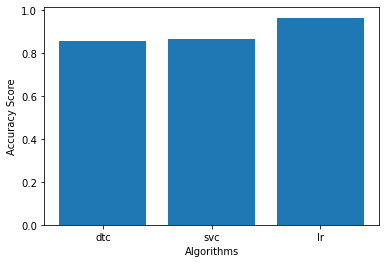

In [32]:
#Final conclusion based on accuracy score
plt.bar(x=['dtc','svc','lr'],height=[dtc_acc,svc_acc,lr_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
# From the above prediction we conclude that the prediction of Logestric Regression is more accurate as compare to others.

In [41]:
lr.predict(x_test)

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0], dtype=int64)